In [1]:
import os
import pandas as pd

os.environ['OMP_NUM_THREADS'] = '1'

DADOS = r'../Dados\Mall_Customer_no_CustomerID.csv'

df = pd.read_csv(DADOS)

preprocessing = ColumnTransformer(

    [
        ("nome",quem vai fazer a transformação, lista das colunas que vão sofrer a transformação),
    ]
)

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessing = ColumnTransformer(

    [
        ("standard",StandardScaler(),['Age','Annual Income (k$)', 'Spending Score (1-100)']),
        ('onehot', OneHotEncoder(), ['Gender'])
    ]
)

df_scaled = pd.DataFrame(preprocessing.fit_transform(df), columns=preprocessing.get_feature_names_out())

df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [3]:
df_scaled.to_csv('../Dados/Mall_Customer_no_CustomerID_scaled.csv', index=False)

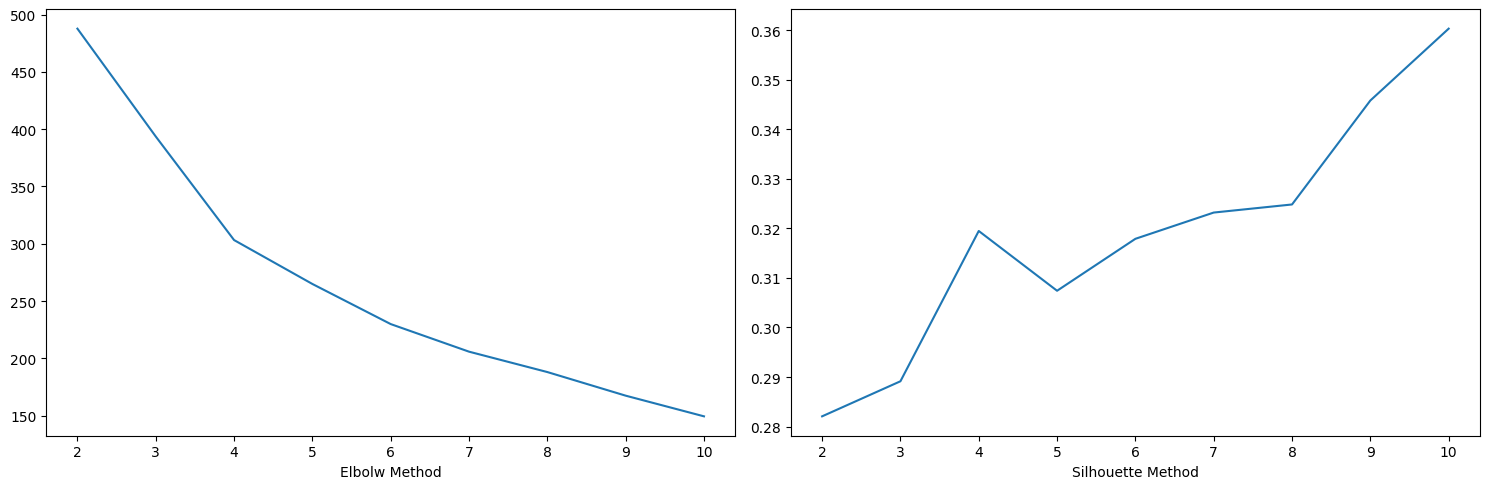

In [4]:
from Funcoes_Auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df_scaled)

In [5]:
from sklearn.cluster import KMeans

pipeline = Pipeline(

[
    ('preprocessing', preprocessing),
    ('clustering',KMeans(n_clusters=5, random_state=42, n_init=10))
]

)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [6]:
pipeline['clustering'].labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4,
       1, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [7]:
df_clustered = df.copy()

df_clustered['Cluster'] = pipeline['clustering'].labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


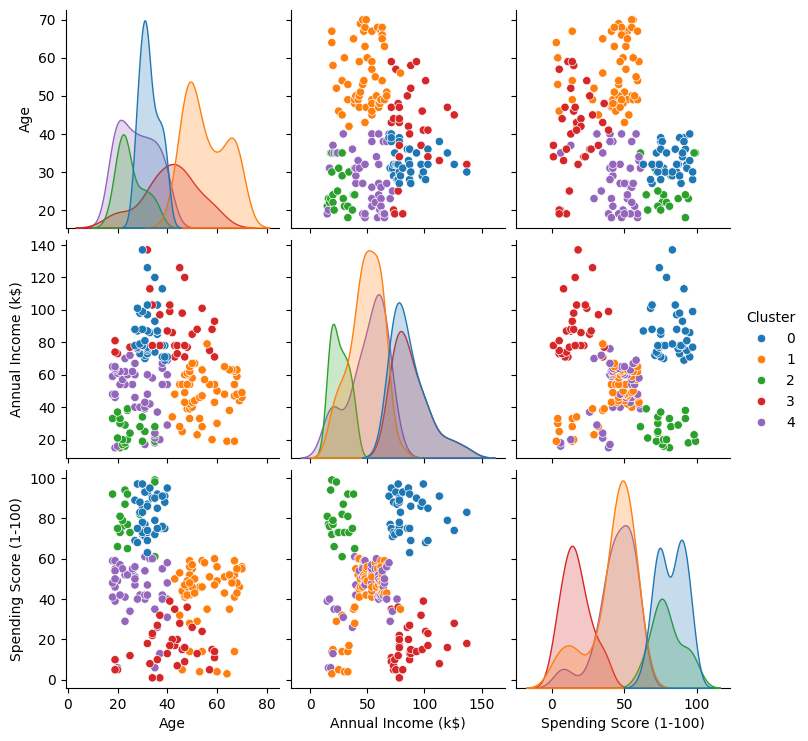

In [8]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind='kde', hue='Cluster', palette='tab10');

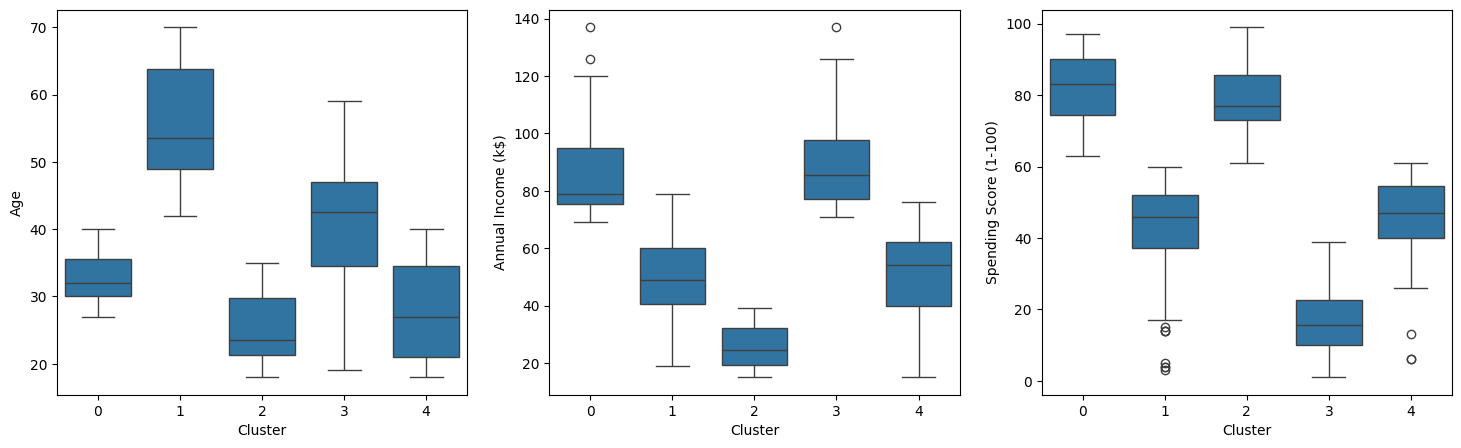

In [9]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for ax, col in zip(axs,df_clustered.select_dtypes('number')):
    sns.boxplot(data=df_clustered, x='Cluster', y=col, ax=ax)

plt.show()

- Cluster 0 - Pontuação de gastos alta, renda alta, idade jovem
- Cluster 1 - Pontuação de gastos moderado, renda moderada, idade alta
- Cluster 2 - Pontuação de gastos alta, renda baixa, idade jovem
- Cluster 3 - Pontuação de gastos baixa, renda alta, idade moderada
- Cluster 4 - Pontuação de gastos moderada, renda moderada, idade jovem

In [10]:
df_clustered['Cluster'].value_counts().sort_index()

Cluster
0    39
1    58
2    22
3    34
4    47
Name: count, dtype: int64

In [11]:
df_clustered.groupby(['Cluster','Gender']).size()

Cluster  Gender
0        Female    21
         Male      18
1        Female    33
         Male      25
2        Female    13
         Male       9
3        Female    14
         Male      20
4        Female    31
         Male      16
dtype: int64

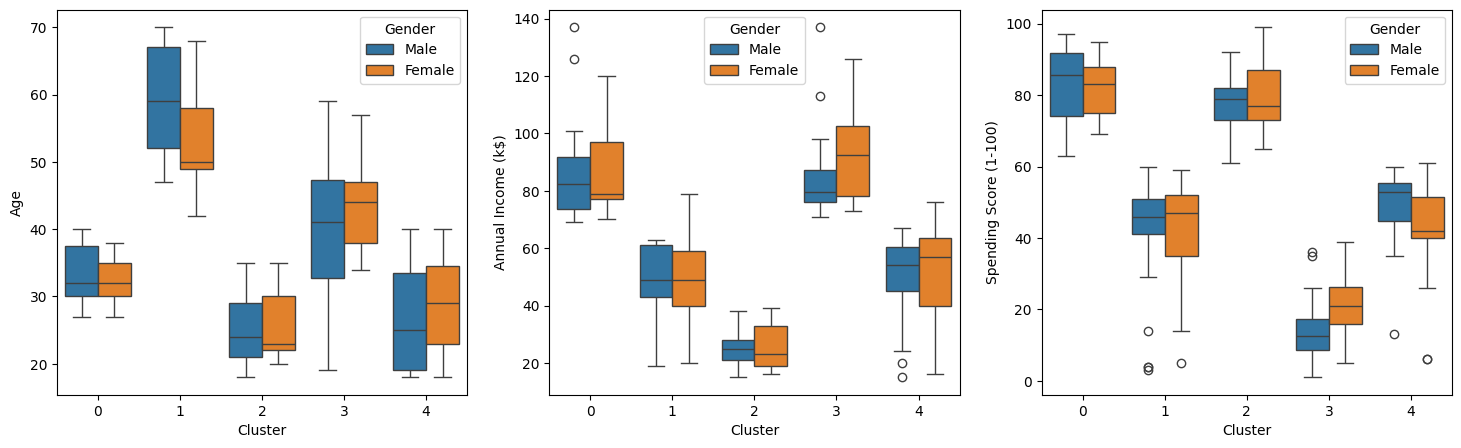

In [12]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for ax, col in zip(axs,df_clustered.select_dtypes('number')):
    sns.boxplot(data=df_clustered, x='Cluster', y=col, ax=ax, hue='Gender')

plt.show()

In [14]:
pipeline['preprocessing'].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [15]:
pipeline['clustering'].cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275,  0.53846154,  0.46153846],
       [ 1.19862745, -0.46098141, -0.32703818,  0.56896552,  0.43103448],
       [-0.97439592, -1.32954532,  1.13217788,  0.59090909,  0.40909091],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.41176471,  0.58823529],
       [-0.78172248, -0.40306917, -0.21591396,  0.65957447,  0.34042553]])

In [16]:
pipeline['clustering'].cluster_centers_[:, :-2]

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])